Introduction:



Import Libaries

In [301]:
print("hello world")
import requests
import pandas as pd # library for data analysis
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
plt.style.use('seaborn')
import pip
import requests # library to handle requests
from bs4 import BeautifulSoup as bs # library to parse HTML documents
!pip install kaggle
!pip install --upgrade jedi==0.17.2
plt.style.use('seaborn')

hello world


This section will set up the Kaggle API

In [302]:
import os
cwd = os.getcwd()
print(cwd)
dir = os.path.join(cwd,".kaggle")
if not os.path.exists(dir):
    os.mkdir(dir)
    
    
!pip install kaggle
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

C:\Users\brminnoc\OneDrive - Microsoft\PPM Role\Career\Learning\Python\Project


Look for Some Data sets

In [303]:
!kaggle datasets list -s 'Pro'

ref                                                  title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/covid-world-vaccination-progress              COVID-19 World Vaccination Progress             1MB  2021-11-21 16:36:08          69412       1923  1.0              
kemical/kickstarter-projects                         Kickstarter Projects                           37MB  2018-02-08 09:02:30          58295       1471  0.7941176        
PromptCloudHQ/flipkart-products                      Flipkart Products                               5MB  2017-09-15 09:35:02          11091        145  1.0              
new-york-city/nyc-property-sales                     NYC Property Sales                              2MB  2017-09-22 19:43:30          19386     

Check that the Kaggle API is working Correctly


In [304]:
!kaggle datasets download fewinder/uci-pro-road-cycling-dataset

uci-pro-road-cycling-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Download the Historic Tour De France Dataset

https://www.kaggle.com/ralle360/historic-tour-de-france-dataset

In [305]:
#!kaggle datasets download -d "ralle360/historic-tour-de-france-dataset", "stages_TDF.csv"
api.dataset_download_file("ralle360/historic-tour-de-france-dataset", file_name = "stages_TDF.csv")
# This worked, but we can do it now send it to different folder below. 

False

Download the UCI Pro Road Cycling Dataset
https://www.kaggle.com/fewinder/uci-pro-road-cycling-dataset
About this file
This dataset holds demographic and team information of every professional road cyclist from 2005 to 2019. Here, "professional" is defined as a member on a UCI registered road team. In 2016, continental team data is not available on the uci.org website.

In [306]:
# Put it in the 'APIData' folder. If you want to get it to do this task again you may need to delete an extiting 'APIData' folder. 

api.dataset_download_file('fewinder/uci-pro-road-cycling-dataset',
                          file_name='UCIRiders0519_2x.csv',
                          path='APIData')


False

In [307]:
api.dataset_download_file('ralle360/historic-tour-de-france-dataset',
                          file_name='stages_TDF.csv',
                          path='APIData')  


False

In [308]:
#Need to uzip the data
import zipfile
with zipfile.ZipFile('APIData/UCIRiders0519_2x.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('APIData')


In [309]:
#Read the Data in to Dataframes. 
UCIPro = pd.read_csv('APIData/UCIRiders0519_2x.csv')
TDFStages = pd.read_csv('APIData/stages_TDF.csv')

In [310]:
print(UCIPro.head())

   Year Function Last Name First Name  Birth date Birth date US  Age  Gender  \
0  2014    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   56    Male   
1  2013    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   55    Male   
2  2019    Rider     PITEL     Edwige  04/06/1967      6/4/1967   52  Female   
3  2018    Rider  NEDERLOF        Lex  10/06/1966     6/10/1966   52    Male   
4  2018    Rider     PITEL     Edwige  04/06/1967      6/4/1967   51  Female   

  Category Country Continent Team Code                             Team Name  \
0      CTM     CAN       AME       GQC                    GARNEAU - QUÉBECOR   
1      CTM     CAN       AME       GQC             EQUIPE GARNEAU - QUÉBECOR   
2      CTW     FRA       EUR       CGS  COGEAS METTLER LOOK PRO CYCLING TEAM   
3      CTM     NED       EUR       CCN                  NEX CCN CYCLING TEAM   
4      CTW     FRA       EUR       CGS     COGEAS - METTLER PRO CYCLING TEAM   

         UCIID  
0  10008746249  
1  1

In [311]:
print(TDFStages.head()) 

  Stage        Date  Distance             Origin  \
0     1  2017-07-01      14.0         Düsseldorf   
1     2  2017-07-02     203.5         Düsseldorf   
2     3  2017-07-03     212.5           Verviers   
3     4  2017-07-04     207.5  Mondorf-les-Bains   
4     5  2017-07-05     160.5             Vittel   

                    Destination                   Type          Winner  \
0                    Düsseldorf  Individual time trial  Geraint Thomas   
1                         Liège             Flat stage   Marcel Kittel   
2                        Longwy  Medium mountain stage     Peter Sagan   
3                        Vittel             Flat stage   Arnaud Démare   
4  La Planche des Belles Filles  Medium mountain stage       Fabio Aru   

  Winner_Country  
0            GBR  
1            GER  
2            SVK  
3            FRA  
4            ITA  


Backup Brexit Data:

api.dataset_download_file('electoralcommission/brexit-results',
                          file_name='census.csv',
                          path='ProjectData')
api.dataset_download_file('electoralcommission/brexit-results',
                          file_name='referendum.csv',
                          path='ProjectData')

Screap https://en.wikipedia.org/wiki/Tour_de_France_records_and_statistics
Most Stage wins
Sage Winnes



In [312]:
# importing the libraries
from bs4 import BeautifulSoup
import requests

Bring in Tour Ranking table from 2021: https://www.letour.fr/en/rankings


In [313]:
#Use BeautifulSoup to brin in the data. 
url='https://www.letour.fr/en/rankings'
TDFPage = requests.get(url)
TDFResults = bs(TDFPage.content, 'lxml')

print(TDFResults.title)
print(TDFResults.title.text)

table = TDFResults.find("div", {"class":'rankingTables'})
#print(TDFResults.prettify()) 


<title>Official classifications of Tour de France 2022 - Stage 21</title>
Official classifications of Tour de France 2022 - Stage 21


In [314]:
TDFResults2021 = pd.read_html(str(table))[0]


In [315]:
# Lets few the Scraping results
#print(TDFResults2021.head())
TDFResults2021

,Rank,Rider,Rank.1,Rider No.,Team,Times,Gap,B,P
0,1,TADEJ POGACAR,1,1,UAE TEAM EMIRATES,82h 56' 36'',-,B : 36'',-
1,2,JONAS VINGEGAARD,2,18,JUMBO - VISMA,83h 01' 56'',+ 00h 05' 20'',B : 12'',-
2,3,RICHARD CARAPAZ,3,22,INEOS GRENADIERS,83h 03' 39'',+ 00h 07' 03'',B : 8'',-
3,4,BEN O'CONNOR,4,124,AG2R CITROEN TEAM,83h 06' 38'',+ 00h 10' 02'',B : 10'',-
4,5,WILCO KELDERMAN,5,73,BORA - HANSGROHE,83h 06' 49'',+ 00h 10' 13'',-,-
...,...,...,...,...,...,...,...,...,...
136,137,MADS PEDERSEN,137,45,TREK - SEGAFREDO,87h 25' 53'',+ 04h 29' 17'',-,-
137,138,MICHAEL MØRKØV,138,58,DECEUNINCK - QUICK - STEP,87h 29' 21'',+ 04h 32' 45'',B : 6'',-
138,139,MARK CAVENDISH,139,55,DECEUNINCK - QUICK - STEP,87h 30' 50'',+ 04h 34' 14'',B : 44'',-
139,140,CEES BOL,140,143,TEAM DSM,87h 33' 15'',+ 04h 36' 39'',-,-


I have crated 3 dataframes:
UCIPro
TDFStages
TDFResults2021

Lets Analyze the UCI Pro DF

In [316]:
#Lets look at the DF: UCIPro
print(UCIPro.head())

   Year Function Last Name First Name  Birth date Birth date US  Age  Gender  \
0  2014    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   56    Male   
1  2013    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   55    Male   
2  2019    Rider     PITEL     Edwige  04/06/1967      6/4/1967   52  Female   
3  2018    Rider  NEDERLOF        Lex  10/06/1966     6/10/1966   52    Male   
4  2018    Rider     PITEL     Edwige  04/06/1967      6/4/1967   51  Female   

  Category Country Continent Team Code                             Team Name  \
0      CTM     CAN       AME       GQC                    GARNEAU - QUÉBECOR   
1      CTM     CAN       AME       GQC             EQUIPE GARNEAU - QUÉBECOR   
2      CTW     FRA       EUR       CGS  COGEAS METTLER LOOK PRO CYCLING TEAM   
3      CTM     NED       EUR       CCN                  NEX CCN CYCLING TEAM   
4      CTW     FRA       EUR       CGS     COGEAS - METTLER PRO CYCLING TEAM   

         UCIID  
0  10008746249  
1  1

def bill_with_tip(df):
    full_bill = df['total_bill'] + df['size']
    return round(full_bill,2)

In [317]:
# Find the Maximum Year:
print("I am now going to look at the UCI Pro data from" , UCIPro["Year"].min(),  " to " , UCIPro["Year"].max())
UCIPro.info()
UCIPro.shape

I am now going to look at the UCI Pro data from 2005  to  2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47442 entries, 0 to 47441
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           47442 non-null  int64 
 1   Function       47442 non-null  object
 2   Last Name      47441 non-null  object
 3   First Name     47442 non-null  object
 4   Birth date     47442 non-null  object
 5   Birth date US  47442 non-null  object
 6   Age            47442 non-null  int64 
 7   Gender         47442 non-null  object
 8   Category       47442 non-null  object
 9   Country        47442 non-null  object
 10  Continent      47442 non-null  object
 11  Team Code      47442 non-null  object
 12  Team Name      47442 non-null  object
 13  UCIID          47442 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 5.1+ MB


(47442, 14)

In [318]:
Over_35 = UCIPro["Age"] > 35
print(Over_35)

0         True
1         True
2         True
3         True
4         True
         ...  
47437    False
47438    False
47439    False
47440    False
47441    False
Name: Age, Length: 47442, dtype: bool


In [319]:
UCIPro["Age"].describe()


count    47442.000000
mean        25.799039
std          4.870689
min         18.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         56.000000
Name: Age, dtype: float64

Next I will Sort the UCIPro by Year

In [320]:
UCIPro = UCIPro.sort_values(by="Year", ascending = True)
UCIPro.head()

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID
47441,2005,Rider,WAHYUDI,Muhammad,12/09/1987,9/12/1987,18,Male,CTM,INA,ASI,WIT,WISMILAK INTERNATIONAL TEAM,10003296768
25291,2005,Rider,OKRUCINSKI,Daniel,31/03/1980,3/31/1980,25,Male,CTM,POL,EUR,PSB,GRUPA PSB - ATLAS - ORBEA,10002538451
25292,2005,Rider,OLDE DUBBELINK,Peter,07/01/1980,1/7/1980,25,Male,CTM,NED,EUR,LOW,TEAM LÖWIK MEUBELEN,10003178752
25293,2005,Rider,OREDSSON,Thomas,02/02/1980,2/2/1980,25,Male,CTM,DEN,EUR,VOL,VOLKSBANK LEINGRUBER IDEAL,10002483786
25294,2005,Rider,OTXOTORENA ARRARAS,Xabat,17/11/1980,11/17/1980,25,Male,CTM,ESP,EUR,ORB,ORBEA,10003208660


#UCIPro["UCID_Year"] = UCIPro["UCIID"]) + str(UCIPro["Year"]))
UCIPro.head()
UCIPro['UCIIDStr']=UCIPro["UCIID"].astype(str)
UCIPro['YearStr']=UCIPro["Year"].astype(str)
UCIPr['UCID_Year'] = UCIPro['UCIIDStr'] + UCIPro['YearStr']
UCIPro.head()

In [321]:
UCIAgeStats = UCIPro.groupby(["Gender"])['Age'].agg(['count','max','mean','median'])
#UCIPro.groupby("Year").count()
print(UCIAgeStats)

        count  max       mean  median
Gender                               
Female   6393   52  25.689504      25
Male    41049   56  25.816098      25


In [322]:
UCIAgeStats.reset_index()
UCIAgeStats.head

<bound method NDFrame.head of         count  max       mean  median
Gender                               
Female   6393   52  25.689504      25
Male    41049   56  25.816098      25>

In [323]:
UCIAgeStats.reset_index()

,Gender,count,max,mean,median
0,Female,6393,52,25.689504,25
1,Male,41049,56,25.816098,25


<AxesSubplot:xlabel='Gender'>

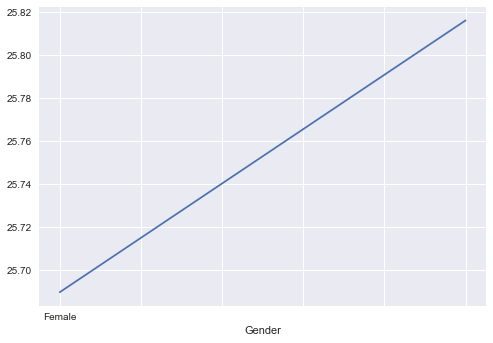

In [329]:
#Just a quick plot to look gendar data. Data above shows similar mean and same median for the male and female cohorts. 
UCIAgeStats['mean'].plot()

Say we want to create a new column, to Career stage, i.e. Under = Young rider , 25 or over = Mature Rider.
First, Create a Career Stage Function

In [330]:
#Define Carreer Stage Funciton
def Career_Sage(df):
    if df <= 24:
        return 'Young Rider'
    elif df >= 36:
        return 'Veteran Rider'
    else:
        return "Mature Rider"

Run the Career Stage Function using .apply()

In [331]:
#Create the 'Career Stage' column for later analysis
UCIPro['Career Stage'] = UCIPro['Age'].apply(Career_Sage)
UCIPro.tail()

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
44830,2019,Rider,KUBIŠ,Lukáš,31/01/2000,1/31/2000,19,Male,CTM,SVK,EUR,DKB,DUKLA BANSKA BYSTRICA,10023479135,Young Rider
44831,2019,Rider,KUHN,Jan,28/01/2000,1/28/2000,19,Male,CTM,GER,EUR,LKH,TEAM LOTTO - KERN HAUS,10043814072,Young Rider
44832,2019,Rider,KULBE,Lars,08/03/2000,3/8/2000,19,Male,CTM,GER,EUR,SVL,TEAM SAUERLAND NRW P / B SKS GERMANY,10036201693,Young Rider
44834,2019,Rider,LAVERICK,Joseph,06/12/2000,12/6/2000,19,Male,CTM,GBR,EUR,MGT,MADISON GENESIS,10023711026,Young Rider
21849,2019,Rider,RUMAC,Josip,26/10/1994,10/26/1994,25,Male,PCT,CRO,EUR,ANS,ANDRONI GIOCATTOLI - SIDERMEC,10007822729,Mature Rider


In [332]:
#a quick demonstration on how we could itterate through rows. 
for index, row in UCIPro.head(2).iterrows():
    print(index)
    print(row)

47441
Year                                    2005
Function                               Rider
Last Name                            WAHYUDI
First Name                          Muhammad
Birth date                        12/09/1987
Birth date US                      9/12/1987
Age                                       18
Gender                                  Male
Category                                 CTM
Country                                  INA
Continent                                ASI
Team Code                                WIT
Team Name        WISMILAK INTERNATIONAL TEAM
UCIID                            10003296768
Career Stage                     Young Rider
Name: 47441, dtype: object
25291
Year                                  2005
Function                             Rider
Last Name                       OKRUCINSKI
First Name                          Daniel
Birth date                      31/03/1980
Birth date US                    3/31/1980
Age                         

(array([2.734e+03, 6.950e+03, 8.336e+03, 7.792e+03, 6.530e+03, 4.910e+03,
        3.658e+03, 2.716e+03, 1.822e+03, 5.980e+02, 7.700e+02, 3.490e+02,
        1.440e+02, 6.700e+01, 3.000e+01, 2.000e+01, 1.000e+01, 4.000e+00,
        0.000e+00, 2.000e+00]),
 array([18. , 19.9, 21.8, 23.7, 25.6, 27.5, 29.4, 31.3, 33.2, 35.1, 37. ,
        38.9, 40.8, 42.7, 44.6, 46.5, 48.4, 50.3, 52.2, 54.1, 56. ]),
 <BarContainer object of 20 artists>)

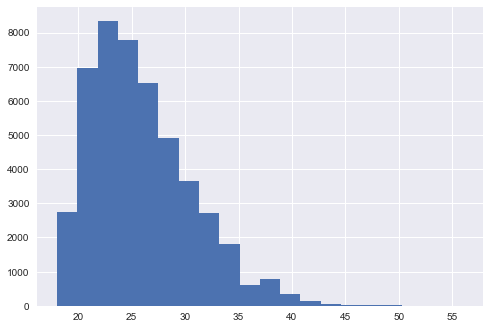

In [333]:
#Lets do a histogram of age. 
#Obeservatin, data is highly skewed to the left. I expect the mean aand median are low. Data shows a higer frequency below 25 years. 
#Conclusion: Many Elite riders don't make it to have a long career, or manybe don't make it to the higest tier of pro cycling, and hence quit to pursue a different career. 
plt.hist(UCIPro['Age'],bins=20)

for index, row in UCIPro[UCIPro["Last Name"] == "ROCHE"].iterrows():
    print(index)
    print(row)

Really intersting that the graph shows the highest frequency is less that 25. Maybe most competative cysclists never make it to the pro ranks. I don't really like the look of this Histogram, so lets look at it with Seaborn, and 

<AxesSubplot:xlabel='Age', ylabel='Count'>

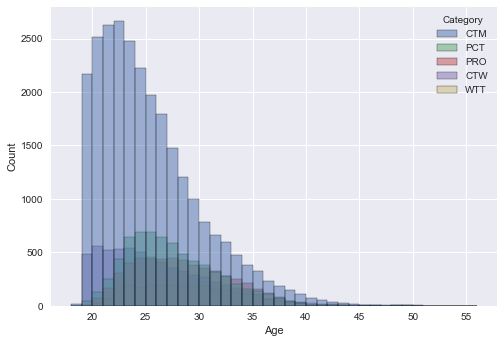

In [334]:
sns.histplot(data = UCIPro, x = "Age", binwidth =1, hue = "Category")
#Plot below shows the vast majority of Profesional Cyclists are CTM,which is the lower tier (feeder) of the profession. The other more elite cyclists have a peak at a later age, which is to be expeted. CTM can be equated to junior formula in motor sport.

<AxesSubplot:xlabel='Age', ylabel='Count'>

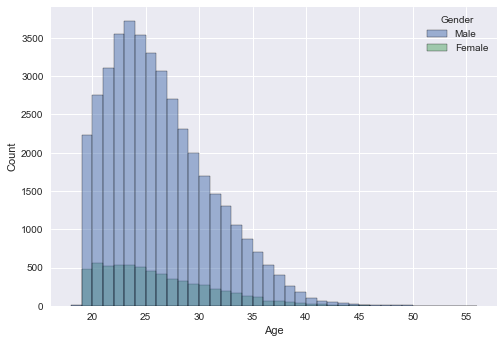

In [335]:
sns.histplot(data = UCIPro, x = "Age", binwidth =1, hue = "Gender")
#I know I do lover histograms, not used enough in my work tbh. 
# We can see here that Pro cycling is dominated by the Men. Similar distribution however in that it is skewed to the left but less of a peak. Possibly due to the extra supports being provided at this pont. 

<AxesSubplot:xlabel='count', ylabel='Career Stage'>

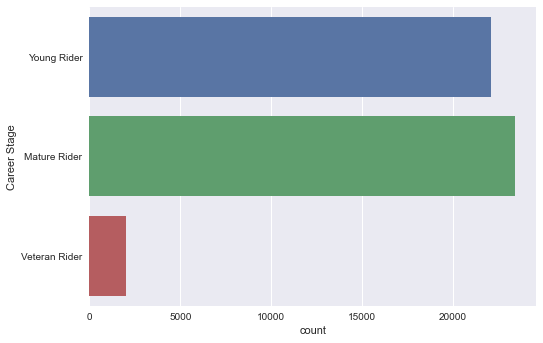

In [336]:
sns.countplot(y=UCIPro["Career Stage"])

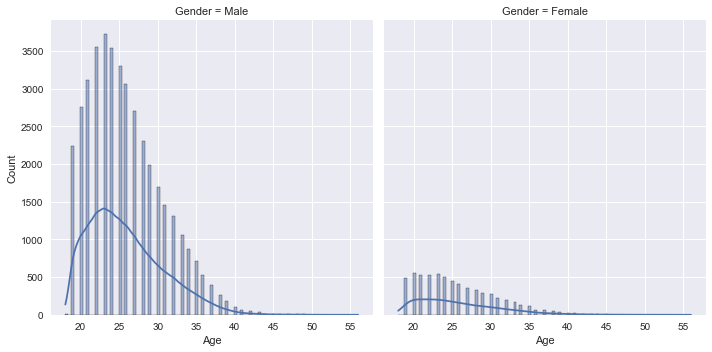

In [337]:
sns.displot(data=UCIPro, x="Age", col="Gender", kde=True)

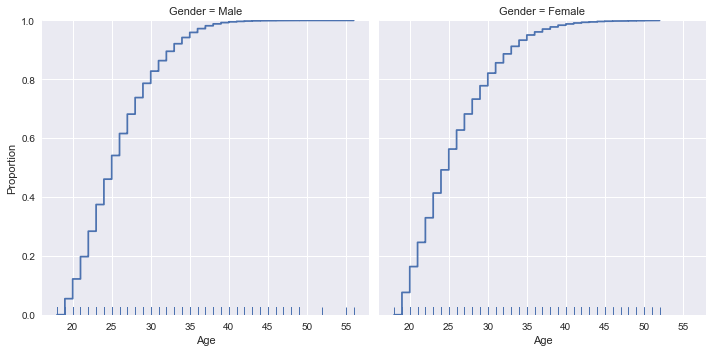

In [338]:
sns.displot(data=UCIPro, kind="ecdf", x="Age", col="Gender", rug=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

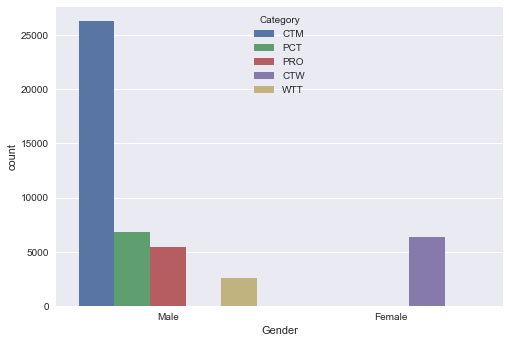

In [339]:
sns.countplot(data = UCIPro, x="Gender", hue = "Category")
#CTM clearly dominateds, With women broken in to only 1 catergory: CTW = Women Continental Team, note: because of French being the UCI language the order of the letters oven change from the english achornym. 

<AxesSubplot:xlabel='Year', ylabel='count'>

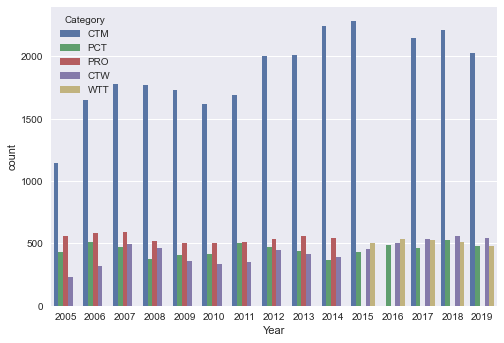

In [340]:
sns.countplot(data = UCIPro, x="Year", hue = "Category")
#Let's look at it by year. Well there does sem to be a cycle. I think the recession from 2020 shows an impact on all level of the sport, with a dip post 2008.  
#we are missing data from 2016 for CTM
#from 2014 to 2015 we loose the "PRO" category and gain "WTT" (World Tour Team). Lets look at our local pro from Dundrum

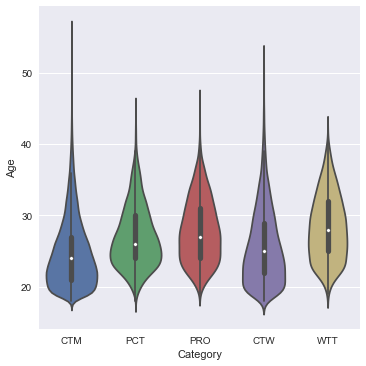

In [341]:
sns.catplot(data=UCIPro, kind="violin", x="Category", y ="Age", split =True)
#The result below is very interesting. Shows that Men's cycling has various popuations with Pro/WTT (Division 1) showing the flattest and most mature poulation. CTM (Division 2) and PCT (Division 3), have lower distruibtion. 
#The CTW (Women's tour) has distribution which contains a more mature distribution, as it does not include divisions. 

<AxesSubplot:xlabel='count', ylabel='Continent'>

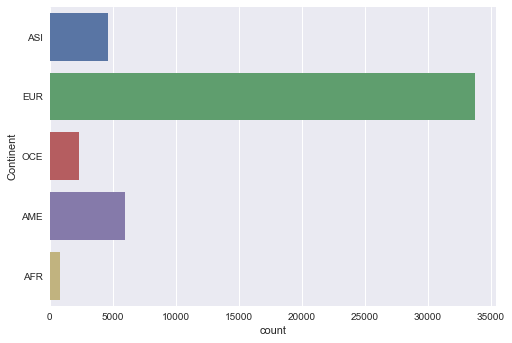

In [342]:
# Create count plot of Continent
sns.countplot(y=UCIPro["Continent"])
#Cycling is dominated by European Rides. 

In [343]:
UCIPro[UCIPro["Last Name"] == "ROCHE"]
#As an aside: Well Nicolas has a namesake. That is unexpected.
#Nicolas was a "PRO" and later was categorized as a "WTT" (World Tour Team) member. This was a rebandings, an not very meaningful. May want to combine these two categories as part of a later project. 

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
41356,2005,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,21,Male,PRO,IRL,EUR,COF,"COFIDIS, LE CREDIT PAR TELEPHONE",10002724872,Young Rider
37519,2006,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,22,Male,PRO,IRL,EUR,COF,"COFIDIS, LE CREDIT PAR TELEPHONE",10002724872,Young Rider
2749,2006,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,35,Male,CTM,IRL,EUR,TMG,TEAM MURPHY & GUNN / NEWLYN,10001143671,Mature Rider
33128,2007,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,23,Male,PRO,IRL,EUR,C.A,CREDIT AGRICOLE,10002724872,Young Rider
28601,2008,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,24,Male,PRO,IRL,EUR,C.A,CREDIT AGRICOLE,10002724872,Young Rider
1301,2008,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,37,Male,CTM,IRL,EUR,POT,PINARELLO RT,10001143671,Veteran Rider
867,2009,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,38,Male,CTM,IRL,EUR,MPT,CANDI TV - MARSHALLS PASTA RT,10001143671,Veteran Rider
24335,2009,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,25,Male,PRO,IRL,EUR,ALM,AG2R LA MONDIALE,10002724872,Mature Rider
564,2010,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,39,Male,CTM,IRL,EUR,MPT,MOTORPOINT - MARSHALLS PASTA,10001143671,Veteran Rider
20427,2010,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,26,Male,PRO,IRL,EUR,ALM,AG2R LA MONDIALE,10002724872,Mature Rider


In [344]:
#Lets look at a pari plot, see if there is anything intersting here. I really like this tool. 

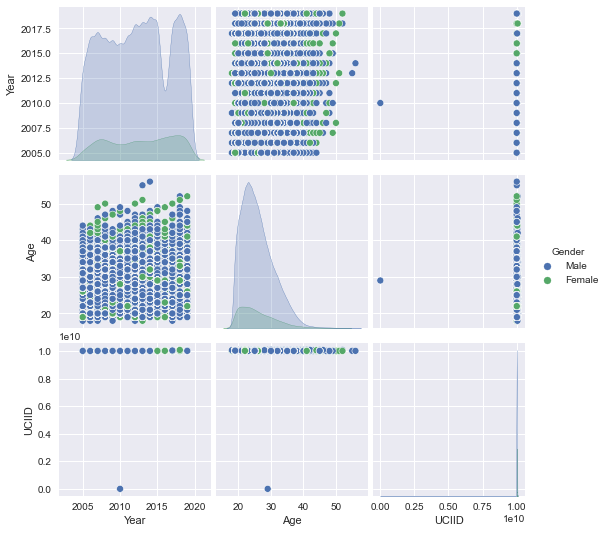

In [345]:
sns.pairplot(UCIPro, hue = "Gender")
#In the graph below it is intesting how it treated the year as a number, and similarly UCIID. Nothing meaninful here so. However the diagonals are intersting as the missing 2016 population is highlighed. As is the more flat nature of the women's age distribution. 

In [346]:
UCIPro.describe()
# the describe function is ued here, reak the data sown. It is meaningless for Year and UCIID, however for age it shows the Mean is c.25.8, where as median is 25. Show how the higer ages can skew the data. The averare is indeed about 25.8, however the "typica Pro" is a little younger.
# The Veterans causing Skew
# it is not a normal/Gaussian distributio, as can be seen from the histograms above. 

,Year,Age,UCIID
count,47442.000000,47442.000000,4.744200e+04
mean,2012.245226,25.799039,1.000665e+10
std,4.295583,4.870689,4.676921e+07
min,2005.000000,18.000000,0.000000e+00
25%,2008.000000,22.000000,1.000293e+10
50%,2012.000000,25.000000,1.000552e+10
75%,2016.000000,29.000000,1.000778e+10
max,2019.000000,56.000000,1.009218e+10


Let's combine: UCIPro & TDFStages
Note we have 3 data sets, but as a follow on I could combine the 2021 results with the rider data. Not required for this project. 

In [347]:

#A quick look at the dataframe .info()
print(UCIPro.info()) # This dataset holds demographic and team information of every professional road cyclist from 2005 to 2019. Here, "professional" is defined as a member on a UCI registered road team.
print(TDFStages.info()) # Tour de France Stage results from 1st of July 1903 to 23rd of July 2017.Tourhttps://www.kaggle.com/ralle360/historic-tour-de-france-dataset
print(TDFResults2021.info()) # Overall Tour de France final Result/Ranking table from 2021: https://www.letour.fr/en/rankings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47442 entries, 47441 to 21849
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           47442 non-null  int64 
 1   Function       47442 non-null  object
 2   Last Name      47441 non-null  object
 3   First Name     47442 non-null  object
 4   Birth date     47442 non-null  object
 5   Birth date US  47442 non-null  object
 6   Age            47442 non-null  int64 
 7   Gender         47442 non-null  object
 8   Category       47442 non-null  object
 9   Country        47442 non-null  object
 10  Continent      47442 non-null  object
 11  Team Code      47442 non-null  object
 12  Team Name      47442 non-null  object
 13  UCIID          47442 non-null  int64 
 14  Career Stage   47442 non-null  object
dtypes: int64(3), object(12)
memory usage: 6.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 8 colu

Let's do some indexing
I want to index on UCIID, however it is not unique in the UCIPro table. However UCIID is not uniquie as riders span mutiple year, and hold the UCIID. See Nicolas Roche data above. 

In [348]:
UCIPro.iloc[1:3,1:5]
#Using .iloc is limited. I need to know where the data I am looking for is. 

,Function,Last Name,First Name,Birth date
25291,Rider,OKRUCINSKI,Daniel,31/03/1980
25292,Rider,OLDE DUBBELINK,Peter,07/01/1980


In [349]:
UCIPro2017 = UCIPro[UCIPro["Year"] == 2017]
UCIPro2017.head() 
#I could choose just 1 year, see below. 

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
34635,2017,Rider,VILLALON SANCHEZ,Aranza Valentina,18/06/1995,6/18/1995,22,Female,CTW,CHI,AME,SLP,WEBER SHIMANO LADIES POWER,10008700779,Young Rider
34636,2017,Rider,VINCENT,Léo,06/11/1995,11/6/1995,22,Male,WTT,FRA,EUR,FDJ,FDJ,10007996117,Young Rider
30239,2017,Rider,KUDUS,Merhawi,23/01/1994,1/23/1994,23,Male,WTT,ERI,AFR,DDD,TEAM DIMENSION DATA,10008855171,Young Rider
18684,2017,Rider,BOGDANOVICS,Maris,19/11/1991,11/19/1991,26,Male,CTM,LAT,EUR,RBR,RIETUMU BANKA - RIGA,10007461708,Mature Rider
18686,2017,Rider,BOSWELL,Ian,07/02/1991,2/7/1991,26,Male,WTT,USA,AME,SKY,TEAM SKY,10006118862,Mature Rider


In [350]:
#lets see which Team Nicolas Roche was in During 2017.
#First set the Indes to "UCIID"
Indexed2017 = UCIPro2017.set_index('UCIID')
print(Indexed2017.head())

             Year Function         Last Name        First Name  Birth date  \
UCIID                                                                        
10008700779  2017    Rider  VILLALON SANCHEZ  Aranza Valentina  18/06/1995   
10007996117  2017    Rider           VINCENT               Léo  06/11/1995   
10008855171  2017    Rider             KUDUS           Merhawi  23/01/1994   
10007461708  2017    Rider       BOGDANOVICS             Maris  19/11/1991   
10006118862  2017    Rider           BOSWELL               Ian  07/02/1991   

            Birth date US  Age  Gender Category Country Continent Team Code  \
UCIID                                                                         
10008700779     6/18/1995   22  Female      CTW     CHI       AME       SLP   
10007996117     11/6/1995   22    Male      WTT     FRA       EUR       FDJ   
10008855171     1/23/1994   23    Male      WTT     ERI       AFR       DDD   
10007461708    11/19/1991   26    Male      CTM     LAT   

In [351]:
#I got nervous and checke my indexing :-). Looks good, UCIID is the index. 
Indexed2017

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,Career Stage
UCIID,,,,,,,,,,,,,,
10008700779,2017,Rider,VILLALON SANCHEZ,Aranza Valentina,18/06/1995,6/18/1995,22,Female,CTW,CHI,AME,SLP,WEBER SHIMANO LADIES POWER,Young Rider
10007996117,2017,Rider,VINCENT,Léo,06/11/1995,11/6/1995,22,Male,WTT,FRA,EUR,FDJ,FDJ,Young Rider
10008855171,2017,Rider,KUDUS,Merhawi,23/01/1994,1/23/1994,23,Male,WTT,ERI,AFR,DDD,TEAM DIMENSION DATA,Young Rider
10007461708,2017,Rider,BOGDANOVICS,Maris,19/11/1991,11/19/1991,26,Male,CTM,LAT,EUR,RBR,RIETUMU BANKA - RIGA,Mature Rider
10006118862,2017,Rider,BOSWELL,Ian,07/02/1991,2/7/1991,26,Male,WTT,USA,AME,SKY,TEAM SKY,Mature Rider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006401879,2017,Rider,LIANG,Hongyu,23/10/1990,10/23/1990,27,Female,CTW,CHN,ASI,GPC,CHINA CHONGMING - LIV PRO CYCLING,Mature Rider
10010972195,2017,Rider,LEWIS,Bryan,31/08/1990,8/31/1990,27,Male,CTM,USA,AME,CPC,CYLANCE CYCLING,Mature Rider
10006070867,2017,Rider,LE BON,Johan,03/10/1990,10/3/1990,27,Male,WTT,FRA,EUR,FDJ,FDJ,Mature Rider


In [352]:
Indexed2017.loc[10002724872]
#Nicolas Roche's UCI ID is "10002724872", actually it isn't it is not a string, it is a number. His deetails are below. 

Year                        2017
Function                   Rider
Last Name                  ROCHE
First Name               Nicolas
Birth date            03/07/1984
Birth date US           7/3/1984
Age                           33
Gender                      Male
Category                     WTT
Country                      IRL
Continent                    EUR
Team Code                    BMC
Team Name        BMC RACING TEAM
Career Stage        Mature Rider
Name: 10002724872, dtype: object

In [353]:
#That was too much info above. Lets pull out less fields. 
Indexed2017.loc[10002724872, ["First Name", "Last Name","Age", "Team Name"]]

First Name            Nicolas
Last Name               ROCHE
Age                        33
Team Name     BMC RACING TEAM
Name: 10002724872, dtype: object

Let's do this a nicer way. 
A lot of data was lost, when we filtered for 2017 to remove the UCIID duplication. Lets do it a smarter way, while keeping riders not from 2017. 

In [354]:
#Create a Consolidated list with rider information, that is not year specific
UCIRiderInfo = UCIPro[["Last Name", "First Name", "Birth date", "Birth date US", "Gender", "Country", "Continent"]]

In [355]:
#Looks good, but we have duplicates for both our both Nicolas & Andrew.
UCIRiderInfo [UCIRiderInfo ["Last Name"]== "ROCHE"]

,Last Name,First Name,Birth date,Birth date US,Gender,Country,Continent
41356,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR
37519,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR
2749,ROCHE,Andrew,22/11/1971,11/22/1971,Male,IRL,EUR
33128,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR
28601,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR
1301,ROCHE,Andrew,22/11/1971,11/22/1971,Male,IRL,EUR
867,ROCHE,Andrew,22/11/1971,11/22/1971,Male,IRL,EUR
24335,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR
564,ROCHE,Andrew,22/11/1971,11/22/1971,Male,IRL,EUR
20427,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR


In [356]:
#let's drop dupliates.
UCIRiderInfo = UCIRiderInfo.drop_duplicates()

In [357]:
#Confirm Duplicates are gone. 
UCIRiderInfo [UCIRiderInfo ["Last Name"]== "ROCHE"]
#Looks good to me :-)

,Last Name,First Name,Birth date,Birth date US,Gender,Country,Continent
41356,ROCHE,Nicolas,03/07/1984,7/3/1984,Male,IRL,EUR
2749,ROCHE,Andrew,22/11/1971,11/22/1971,Male,IRL,EUR


In [358]:
#Join this Rider Info with the ProList:UCIRiderInfo  Join TDFStages
print(UCIRiderInfo.head())
print(TDFStages.head())
#Join on Winner and Name. Need to create Name column


                Last Name First Name  Birth date Birth date US Gender Country  \
47441             WAHYUDI   Muhammad  12/09/1987     9/12/1987   Male     INA   
25291          OKRUCINSKI     Daniel  31/03/1980     3/31/1980   Male     POL   
25292      OLDE DUBBELINK      Peter  07/01/1980      1/7/1980   Male     NED   
25293            OREDSSON     Thomas  02/02/1980      2/2/1980   Male     DEN   
25294  OTXOTORENA ARRARAS      Xabat  17/11/1980    11/17/1980   Male     ESP   

      Continent  
47441       ASI  
25291       EUR  
25292       EUR  
25293       EUR  
25294       EUR  
  Stage        Date  Distance             Origin  \
0     1  2017-07-01      14.0         Düsseldorf   
1     2  2017-07-02     203.5         Düsseldorf   
2     3  2017-07-03     212.5           Verviers   
3     4  2017-07-04     207.5  Mondorf-les-Bains   
4     5  2017-07-05     160.5             Vittel   

                    Destination                   Type          Winner  \
0                 

In [359]:
#There is a difference in format. Need to handle the UCIRider having rider name broken in to first & Last name, and having the Last name capilized. 
UCIRiderInfo["CapsName"] = UCIRiderInfo["First Name"] + " " + UCIRiderInfo["Last Name"]
UCIRiderInfo["CapsName"] = UCIRiderInfo["CapsName"].str.upper()
UCIRiderInfo
TDFStages["CapsName"] = TDFStages["Winner"]
TDFStages["CapsName"] = TDFStages["CapsName"].str.upper()
TDFStages


,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,CapsName
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,GERAINT THOMAS
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,MARCEL KITTEL
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,PETER SAGAN
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,ARNAUD DÉMARE
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,FABIO ARU
...,...,...,...,...,...,...,...,...,...
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,HIPPOLYTE AUCOUTURIER
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,HIPPOLYTE AUCOUTURIER
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI,CHARLES LAESER
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,MAURICE GARIN


In [360]:
#Perform a join
TDFStageWinners = UCIRiderInfo.merge(TDFStages, left_on= "CapsName", right_on = "CapsName", how= "inner")

#To improve the joining I could use the function below to remove the accents. I don't have time at the moment. 
import unicodedata
def strip_accents(s):
   return ''.join(c for c in TDFStages.normalize("CapsName", s)
                  if unicodedata.category(c) != 'Mn')

In [361]:
#Lets check the data. The inner join means that we have dropped any rows that don't join. Hence we lose "Arnaud Démare" due to the french accent not being in one of the datasets. 
TDFStageWinners

,Last Name,First Name,Birth date,Birth date US,Gender,Country,Continent,CapsName,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,PAULINHO,Sérgio,26/03/1980,3/26/1980,Male,POR,EUR,SÉRGIO PAULINHO,10,2010-07-14,179.0,Chambéry,Gap,Medium mountain stage,Sérgio Paulinho,POR
1,POPOVYCH,Yaroslav,04/01/1980,1/4/1980,Male,UKR,EUR,YAROSLAV POPOVYCH,12,2006-07-14,211.5,Luchon,Carcassonne,Hilly stage,Yaroslav Popovych,UKR
2,VALVERDE,Alejandro,25/04/1980,4/25/1980,Male,ESP,EUR,ALEJANDRO VALVERDE,17,2012-07-19,143.5,Bagnères-de-Luchon,Peyragudes,High mountain stage,Alejandro Valverde,ESP
3,VALVERDE,Alejandro,25/04/1980,4/25/1980,Male,ESP,EUR,ALEJANDRO VALVERDE,1,2008-07-05,197.5,Brest,Plumelec,Flat stage,Alejandro Valverde,ESP
4,VALVERDE,Alejandro,25/04/1980,4/25/1980,Male,ESP,EUR,ALEJANDRO VALVERDE,6,2008-07-10,195.5,Aigurande,Super-Besse Sancy,Transition stage,Alejandro Valverde,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,ARU,Fabio,03/07/1990,7/3/1990,Male,ITA,EUR,FABIO ARU,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA
326,GROENEWEGEN,Dylan,21/06/1993,6/21/1993,Male,NED,EUR,DYLAN GROENEWEGEN,21,2017-07-23,103.0,Montgeron,Paris,Flat stage,Dylan Groenewegen,NED
327,VUILLERMOZ,Alexis,01/06/1988,6/1/1988,Male,FRA,EUR,ALEXIS VUILLERMOZ,8,2015-07-11,181.5,Rennes,Mûr-de-Bretagne,Flat stage,Alexis Vuillermoz,FRA
328,ROGLIČ,Primož,29/10/1989,10/29/1989,Male,SLO,EUR,PRIMOŽ ROGLIČ,17,2017-07-19,183.0,La Mure,Serre Chevalier,High mountain stage,Primož Roglič,SLO



If I had time I would strip the Accents in French to improve the join. Code would look something like this. 
import unicodedata
def strip_accents(s):
   return ''.join(c for c in TDFStages.normalize("CapsName", s)
                  if unicodedata.category(c) != 'Mn')

In [362]:
#Calculate the average Distance of a stage
print(TDFStageWinners.mean())

Distance    173.53303
dtype: float64


Lets look at Country and Rider win rates. 



In [363]:
UCICountryStats = TDFStageWinners.groupby(["Country"])['Winner'].agg(['count'])
print(UCICountryStats)
UCIRiderStats = TDFStageWinners.groupby(["CapsName"])['Winner'].agg(['count'])
print(UCIRiderStats)

         count
Country       
AUS         26
AUT          1
BEL         28
COL          1
CZE          4
DEN          6
ESP          4
EST          4
FRA         41
GBR         44
GER         56
ITA         35
LUX          6
NED         18
NOR         18
POL          1
POR          4
RSA          1
RUS          4
SLO          1
SUI          9
SVK          8
UKR          3
USA          7
                     count
CapsName                  
ALEJANDRO VALVERDE       4
ALESSANDRO FANTINI       2
ALESSANDRO PETACCHI      6
ALEXANDER KRISTOFF       2
ALEXIS VUILLERMOZ        1
...                    ...
VINCENZO NIBALI          5
VLADIMIR EFIMKIN         1
WARREN BARGUIL           2
YAROSLAV POPOVYCH        1
ZDENĚK ŠTYBAR            1

[131 rows x 1 columns]


In [364]:
#This data is intersting, however it is not easy to read. Lets try to order them and make a dictionary. 
#We will use some numpy functions, first. 

UCICountryStats = UCICountryStats.reset_index() # Need to reset the index, as country is our current index, and would not be brought in to our array. 
TDFCountry_array= UCICountryStats.to_numpy() #Conver to a nupy array. 

In [365]:
#UCICountryStats
TDFCountry_array

array([['AUS', 26],
       ['AUT', 1],
       ['BEL', 28],
       ['COL', 1],
       ['CZE', 4],
       ['DEN', 6],
       ['ESP', 4],
       ['EST', 4],
       ['FRA', 41],
       ['GBR', 44],
       ['GER', 56],
       ['ITA', 35],
       ['LUX', 6],
       ['NED', 18],
       ['NOR', 18],
       ['POL', 1],
       ['POR', 4],
       ['RSA', 1],
       ['RUS', 4],
       ['SLO', 1],
       ['SUI', 9],
       ['SVK', 8],
       ['UKR', 3],
       ['USA', 7]], dtype=object)

In [366]:
#Sort Alphabetically. 
np.sort(TDFCountry_array, axis = 0)
print(TDFCountry_array)
#Result below is inteseting, but lets go for a pareto typy ordering. Higher first. 

[['AUS' 26]
 ['AUT' 1]
 ['BEL' 28]
 ['COL' 1]
 ['CZE' 4]
 ['DEN' 6]
 ['ESP' 4]
 ['EST' 4]
 ['FRA' 41]
 ['GBR' 44]
 ['GER' 56]
 ['ITA' 35]
 ['LUX' 6]
 ['NED' 18]
 ['NOR' 18]
 ['POL' 1]
 ['POR' 4]
 ['RSA' 1]
 ['RUS' 4]
 ['SLO' 1]
 ['SUI' 9]
 ['SVK' 8]
 ['UKR' 3]
 ['USA' 7]]


In [367]:
#but first look at the items at the start of the arry. 
#find the number first 4 items in the array 
print(TDFCountry_array[0:5,:])

[['AUS' 26]
 ['AUT' 1]
 ['BEL' 28]
 ['COL' 1]
 ['CZE' 4]]


In [368]:
#np.amax(TDFCountry_array, axis = 0)


In [369]:
#Order it negatively
Orderedarray = TDFCountry_array[np.argsort(-1*TDFCountry_array[:, 1])]
print(Orderedarray)

[['GER' 56]
 ['GBR' 44]
 ['FRA' 41]
 ['ITA' 35]
 ['BEL' 28]
 ['AUS' 26]
 ['NOR' 18]
 ['NED' 18]
 ['SUI' 9]
 ['SVK' 8]
 ['USA' 7]
 ['LUX' 6]
 ['DEN' 6]
 ['POR' 4]
 ['RUS' 4]
 ['CZE' 4]
 ['EST' 4]
 ['ESP' 4]
 ['UKR' 3]
 ['COL' 1]
 ['POL' 1]
 ['RSA' 1]
 ['SLO' 1]
 ['AUT' 1]]


In [370]:
#Now that we have reorderd we get the top 5 "most winning" countries.
print(Orderedarray[0:5,:])

[['GER' 56]
 ['GBR' 44]
 ['FRA' 41]
 ['ITA' 35]
 ['BEL' 28]]


In [371]:
#Now that we have reorderd we get the bottom 5 "most winning" countries.
print(Orderedarray[-5:,:])

[['COL' 1]
 ['POL' 1]
 ['RSA' 1]
 ['SLO' 1]
 ['AUT' 1]]


In [372]:
#A dictionary would be nicer, easer to look up. 
CountryWindictionary = dict(Orderedarray)

In [373]:
CountryWindictionary

{'GER': 56,
 'GBR': 44,
 'FRA': 41,
 'ITA': 35,
 'BEL': 28,
 'AUS': 26,
 'NOR': 18,
 'NED': 18,
 'SUI': 9,
 'SVK': 8,
 'USA': 7,
 'LUX': 6,
 'DEN': 6,
 'POR': 4,
 'RUS': 4,
 'CZE': 4,
 'EST': 4,
 'ESP': 4,
 'UKR': 3,
 'COL': 1,
 'POL': 1,
 'RSA': 1,
 'SLO': 1,
 'AUT': 1}

In [374]:
#Lets look at the GB results. 
#How many wins did the GB get:
CountryWindictionary["GBR"]

44

In [375]:
#Make it a short sentance
print("GB had " + str(CountryWindictionary["GBR"]) +" wins")

GB had 44 wins


In [376]:
#Lets graph the results
dfWins = pd.DataFrame(data=Orderedarray, columns=["Country", "Wins"])

<AxesSubplot:xlabel='Country', ylabel='Wins'>

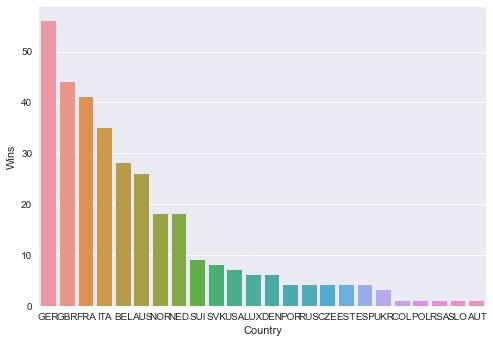

In [377]:
sns.barplot(data = dfWins, x = "Country", y = "Wins")

In [378]:
#Here I will create some more datasets, for later analysis. 

In [379]:
#Create a list of Female Riders for later analysis
UCIWomensTour = UCIPro[UCIPro["Gender"] == "Female"]
UCIWomensTour.head()



,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
25311,2005,Rider,PUCCIONI,Irene,02/06/1980,6/2/1980,25,Female,CTW,ITA,EUR,MIC,S.C. MICHELA FANINI RECORD ROX,10002077703,Mature Rider
25262,2005,Rider,LIEBIG,Tina,28/04/1980,4/28/1980,25,Female,CTW,GER,EUR,NUR,EQUIPE NÜRNBERGER VERSICHERUNG,10001485191,Mature Rider
25277,2005,Rider,MIGGELS,Kristy,06/08/1980,8/6/1980,25,Female,CTW,NED,EUR,VVP,VRIENDEN VAN HET PLATTELAND,10001485292,Mature Rider
25283,2005,Rider,MULDER,Brigit,20/11/1980,11/20/1980,25,Female,CTW,NED,EUR,HCT,@WORK CYCLING TEAM,10002452969,Mature Rider
25284,2005,Rider,MURILLO ELKANO,Iosune,14/05/1980,5/14/1980,25,Female,CTW,ESP,EUR,BPD,BIZKAIA - PANDA SOFTWARE - DURANGO,10001459226,Mature Rider


In [380]:
#Create a list of Female Riders for later analysis
UCIProMale = UCIPro[UCIPro["Gender"] == "Male"]
UCIProMale.tail() 

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
44830,2019,Rider,KUBIŠ,Lukáš,31/01/2000,1/31/2000,19,Male,CTM,SVK,EUR,DKB,DUKLA BANSKA BYSTRICA,10023479135,Young Rider
44831,2019,Rider,KUHN,Jan,28/01/2000,1/28/2000,19,Male,CTM,GER,EUR,LKH,TEAM LOTTO - KERN HAUS,10043814072,Young Rider
44832,2019,Rider,KULBE,Lars,08/03/2000,3/8/2000,19,Male,CTM,GER,EUR,SVL,TEAM SAUERLAND NRW P / B SKS GERMANY,10036201693,Young Rider
44834,2019,Rider,LAVERICK,Joseph,06/12/2000,12/6/2000,19,Male,CTM,GBR,EUR,MGT,MADISON GENESIS,10023711026,Young Rider
21849,2019,Rider,RUMAC,Josip,26/10/1994,10/26/1994,25,Male,PCT,CRO,EUR,ANS,ANDRONI GIOCATTOLI - SIDERMEC,10007822729,Mature Rider


In [381]:
TDFResults2021

,Rank,Rider,Rank.1,Rider No.,Team,Times,Gap,B,P
0,1,TADEJ POGACAR,1,1,UAE TEAM EMIRATES,82h 56' 36'',-,B : 36'',-
1,2,JONAS VINGEGAARD,2,18,JUMBO - VISMA,83h 01' 56'',+ 00h 05' 20'',B : 12'',-
2,3,RICHARD CARAPAZ,3,22,INEOS GRENADIERS,83h 03' 39'',+ 00h 07' 03'',B : 8'',-
3,4,BEN O'CONNOR,4,124,AG2R CITROEN TEAM,83h 06' 38'',+ 00h 10' 02'',B : 10'',-
4,5,WILCO KELDERMAN,5,73,BORA - HANSGROHE,83h 06' 49'',+ 00h 10' 13'',-,-
...,...,...,...,...,...,...,...,...,...
136,137,MADS PEDERSEN,137,45,TREK - SEGAFREDO,87h 25' 53'',+ 04h 29' 17'',-,-
137,138,MICHAEL MØRKØV,138,58,DECEUNINCK - QUICK - STEP,87h 29' 21'',+ 04h 32' 45'',B : 6'',-
138,139,MARK CAVENDISH,139,55,DECEUNINCK - QUICK - STEP,87h 30' 50'',+ 04h 34' 14'',B : 44'',-
139,140,CEES BOL,140,143,TEAM DSM,87h 33' 15'',+ 04h 36' 39'',-,-


In [382]:
#Merger The 2021 Tour de France results with the rider table.
TDFRanking2021 = TDFResults2021.merge(UCIRiderInfo, left_on= "Rider", right_on = "CapsName", how= "inner")
TDFRanking2021.head()


,Rank,Rider,Rank.1,Rider No.,Team,Times,Gap,B,P,Last Name,First Name,Birth date,Birth date US,Gender,Country,Continent,CapsName
0,2,JONAS VINGEGAARD,2,18,JUMBO - VISMA,83h 01' 56'',+ 00h 05' 20'',B : 12'',-,VINGEGAARD,Jonas,10/12/1996,12/10/1996,Male,DEN,EUR,JONAS VINGEGAARD
1,3,RICHARD CARAPAZ,3,22,INEOS GRENADIERS,83h 03' 39'',+ 00h 07' 03'',B : 8'',-,CARAPAZ,Richard,29/05/1993,5/29/1993,Male,ECU,AME,RICHARD CARAPAZ
2,4,BEN O'CONNOR,4,124,AG2R CITROEN TEAM,83h 06' 38'',+ 00h 10' 02'',B : 10'',-,O'CONNOR,Ben,25/11/1995,11/25/1995,Male,AUS,OCE,BEN O'CONNOR
3,5,WILCO KELDERMAN,5,73,BORA - HANSGROHE,83h 06' 49'',+ 00h 10' 13'',-,-,KELDERMAN,Wilco,25/03/1991,3/25/1991,Male,NED,EUR,WILCO KELDERMAN
4,7,ALEXEY LUTSENKO,7,188,ASTANA - PREMIER TECH,83h 08' 59'',+ 00h 12' 23'',-,-,LUTSENKO,Alexey,07/09/1992,9/7/1992,Male,KAZ,ASI,ALEXEY LUTSENKO


In [383]:
#if you look at the table above we are missing rankings 1 & 6, and 7th has poped in to our table. This is an ordered table. 
#The winner (Tadej Pocar) and 6th place (ENRIC MAS) not competing at the highest levels in 2019. They were early in career in 2019, so that may be a flaw in our original dataset. 
TDFResults2021.head(7)

,Rank,Rider,Rank.1,Rider No.,Team,Times,Gap,B,P
0,1,TADEJ POGACAR,1,1,UAE TEAM EMIRATES,82h 56' 36'',-,B : 36'',-
1,2,JONAS VINGEGAARD,2,18,JUMBO - VISMA,83h 01' 56'',+ 00h 05' 20'',B : 12'',-
2,3,RICHARD CARAPAZ,3,22,INEOS GRENADIERS,83h 03' 39'',+ 00h 07' 03'',B : 8'',-
3,4,BEN O'CONNOR,4,124,AG2R CITROEN TEAM,83h 06' 38'',+ 00h 10' 02'',B : 10'',-
4,5,WILCO KELDERMAN,5,73,BORA - HANSGROHE,83h 06' 49'',+ 00h 10' 13'',-,-
5,6,ENRIC MAS,6,65,MOVISTAR TEAM,83h 08' 19'',+ 00h 11' 43'',-,-
6,7,ALEXEY LUTSENKO,7,188,ASTANA - PREMIER TECH,83h 08' 59'',+ 00h 12' 23'',-,-


In [384]:
TDFResults2021.info()
TDFRanking2021.info()
#Run the code and you will see that we have lost 14 rows in the results. i.e. we have failed to match 14 riders. Should be investigated. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       141 non-null    int64 
 1   Rider      141 non-null    object
 2   Rank.1     141 non-null    int64 
 3   Rider No.  141 non-null    int64 
 4   Team       141 non-null    object
 5   Times      141 non-null    object
 6   Gap        141 non-null    object
 7   B          141 non-null    object
 8   P          141 non-null    object
dtypes: int64(3), object(6)
memory usage: 10.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           127 non-null    int64 
 1   Rider          127 non-null    object
 2   Rank.1         127 non-null    int64 
 3   Rider No.      127 non-null    int64 
 4   Team           127 non-null    object
 5   Times

In [385]:
TDFStages

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,CapsName
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,GERAINT THOMAS
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,MARCEL KITTEL
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,PETER SAGAN
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,ARNAUD DÉMARE
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,FABIO ARU
...,...,...,...,...,...,...,...,...,...
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,HIPPOLYTE AUCOUTURIER
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,HIPPOLYTE AUCOUTURIER
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI,CHARLES LAESER
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,MAURICE GARIN


In [386]:

TDFStages['ProperDate'] = pd.to_datetime(TDFStages['Date'])
# Create Year Column
TDFStages['Year'] = TDFStages['ProperDate'].dt.to_period("Y")

In [387]:
TDFStages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stage           2236 non-null   object        
 1   Date            2236 non-null   object        
 2   Distance        2236 non-null   float64       
 3   Origin          2236 non-null   object        
 4   Destination     2236 non-null   object        
 5   Type            2236 non-null   object        
 6   Winner          2236 non-null   object        
 7   Winner_Country  2184 non-null   object        
 8   CapsName        2236 non-null   object        
 9   ProperDate      2236 non-null   datetime64[ns]
 10  Year            2236 non-null   period[A-DEC] 
dtypes: datetime64[ns](1), float64(1), object(8), period[A-DEC](1)
memory usage: 192.3+ KB


In [388]:
#TDFStages
TDFStages['YearStr'] = TDFStages['Year'].dt.strftime('%Y')

#pd.to_string(TDFStages['ProperYear'])
#sns.scatterplot(data= TDFStages, x="Year", y ="Distance")

In [389]:
TDFStages['YearInt'] = TDFStages['Year'].apply(str)

In [390]:
TDFStages

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,CapsName,ProperDate,Year,YearStr,YearInt
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,GERAINT THOMAS,2017-07-01,2017,2017,2017
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,MARCEL KITTEL,2017-07-02,2017,2017,2017
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,PETER SAGAN,2017-07-03,2017,2017,2017
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,ARNAUD DÉMARE,2017-07-04,2017,2017,2017
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,FABIO ARU,2017-07-05,2017,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,HIPPOLYTE AUCOUTURIER,1903-07-05,1903,1903,1903
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,HIPPOLYTE AUCOUTURIER,1903-07-08,1903,1903,1903
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI,CHARLES LAESER,1903-07-12,1903,1903,1903
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,MAURICE GARIN,1903-07-13,1903,1903,1903


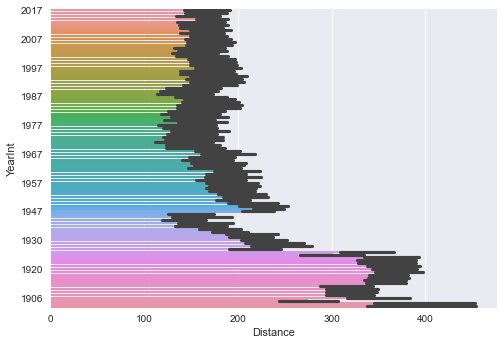

In [391]:
#plt.scatter(TDFStages['YearInt'] , TDFStages['Distance'] , s=2)
#plt.show()
BPLT = sns.barplot(data=TDFStages, y= 'YearInt' , x= 'Distance')
BPLT.set(xlabel="Distance", ylabel = "YearInt")
for ind, label in enumerate(BPLT .get_yticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

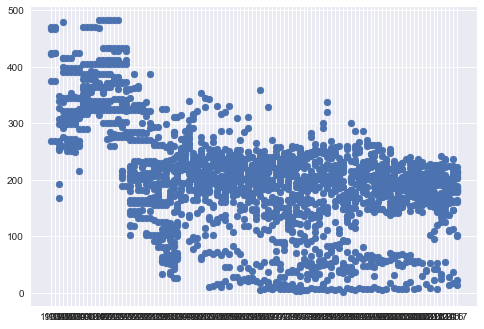

In [392]:
scatter = plt.scatter(x= TDFStages['YearInt'] , y= TDFStages['Distance'])
ax = scatter.axes
ax.invert_xaxis()
#ax.invert_yaxis()


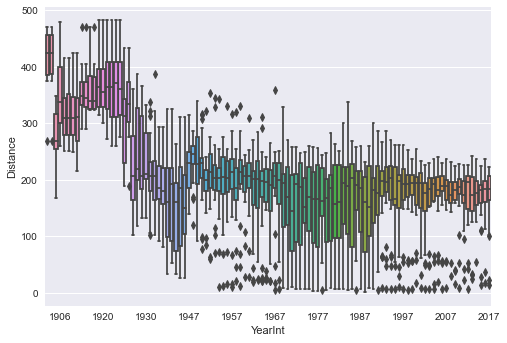

In [393]:
BoxPlT = sns.boxplot(data=TDFStages, x= 'YearInt' , y= 'Distance')
BoxPlT.invert_xaxis()
for ind, label in enumerate(BoxPlT.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

<AxesSubplot:xlabel='Distance', ylabel='Type'>

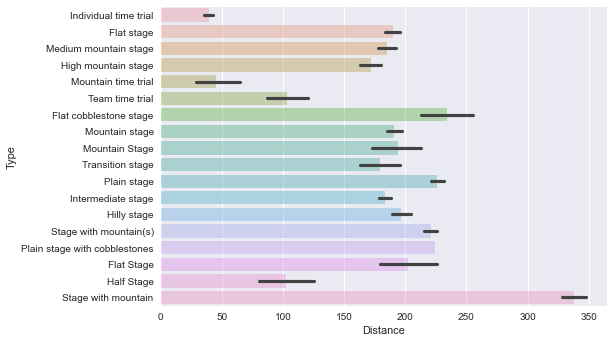

In [394]:
sns.barplot(data=TDFStages, y= 'Type' , x= 'Distance', alpha = 0.4)
# You can see that time trial sages are the shortest in the Tour de France

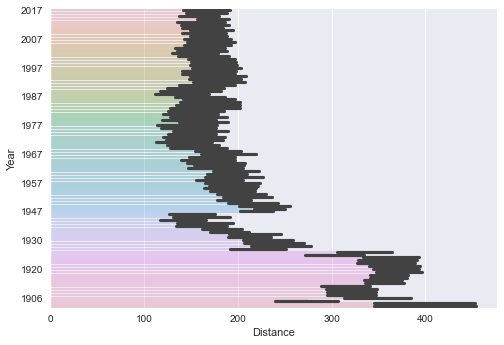

In [395]:
plot_ = sns.barplot(data=TDFStages, y= 'Year' , x= 'Distance' , alpha = 0.4)
for ind, label in enumerate(plot_ .get_yticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Machine Learning
According to SAS Institute (2021), "Machine learning is a method of data analysis that automates analytical model building" to "identify patterns and make decisions with minimal human intervention." For my project it would be possible to create a model to identify the characteristics of a Tour de France winner. We have some indicators which would include nationality, age and potentially team. Another factor that could be considered is the type of stages, and stages as a whole for the overall result. It is known that as the event becomes more hilly it is more likely that a light rider will win, the flat stages favour heavier riders and time trialists are typical somewhere in between. It should also be noted that as the nature of the Tour de France stages, road surfaces, bike technology and national support for the sport changed over time this temporal factor would need to be adjusted for. It used to be said that 27 years old is the optimal age to win the race. Now with Power, lung capacity and scientific techniques available to coaches it is easier to identify talent at an earlier age, resulting in younger winners, which again would require a temporal component. I would consider a logistic model (or logit model) "to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick" (Wikipedia, 2021). Note that this is a supervised technique, and has the advantage of being interpretable model, and might provide a general model of the characteristics of a Tour de France winner. If a more complex model was to be built with a lot of detail about each stage, and increased dimensions it may require a deep neural network due to complexity. This would be difficult to interpret, however it should be noted that packages like "lime" (Towards Data Science, 2021) are helping with model interpretation. It should be noted that the data for the models described above will be labelled, hence supervised learning, as it will be based on the historical winner, i.e. stage and overall winner results. It may also be useful to use unsupervised learning to look for clusters in the data, especially during the data discovery phase of the project. 
    
      
    
  Refferences:  
- SAS Institute (2021) ‘Machine Learning What it is and why it matters’, . Available at URL:https://www.sas.com/en_ie/insights/analytics/machine-learning.html#:~:text=Machine%20learning%20is%20a%20method,decisions%20with%20minimal%20human%20intervention (Accessed: 22, Nov. 2021).
- Wikipedia (2021) 'Logistic regression' . Available at URL: https://en.wikipedia.org/wiki/Logistic_regression (Accessed: 22, Nov. 2021).
- Towards Data Science (2021)'Decrypting your Machine Learning model using LIME'. Available at URL: https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5(Accessed: 22, Nov. 2021).
   
    